随机森林回归器

概念及原理：随机森林运用的是其实是集成（bagging）的概念，简单来说就是运用多个决策树的结果来得到最后的结果。因此这个模型通常会具有更高的稳健性。当然随着其中的集成的方式的不同，也有衍生出了很多不同的机器学习算法。
作用：预测连续性数据

建模关键点：找出最佳的节点和分枝

主要参数：
criterion（mse\mae\friedman_mse）--数据纯度
max_depth、min_samples_leaf & min_samples_split、max_features --剪枝参数，过拟合问题的关键
random_state --随机参数
n_estimators --森林中树的数量
bootstrap & oob_score --训练方式

属性：feature_importances

接口：fit（训练参数）、score（训练结果）、prodict（预测）
优缺点：
优点，相比于传统的模型，这个模型的精度也会比较高

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

In [3]:
boston = datasets.load_boston()

In [5]:
x_train,x_test,y_train,y_test =  train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

In [7]:
rf = RandomForestRegressor(n_estimators=20,random_state=0)
cross_val_score(rf, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')

array([-12.38782353,  -5.09927255,  -4.69015686, -21.51381275,
       -11.91144314, -16.34868137,  -6.86326   , -94.8887615 ,
       -33.7766475 , -16.8240465 ])

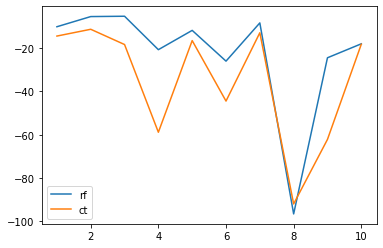

In [13]:
# 10交叉验证下的对比情况
list=[RandomForestRegressor(n_estimators=25),DecisionTreeRegressor(random_state=30)]
for index,i in enumerate(list,1):
    cls=i
    cls=cross_val_score(cls,boston.data,boston.target,cv=10,scoring='neg_mean_squared_error')
    plt.plot(range(1,11),cls,label='rf' if index==1 else 'ct' )
plt.legend()
plt.show()

0.47323459542767254 71


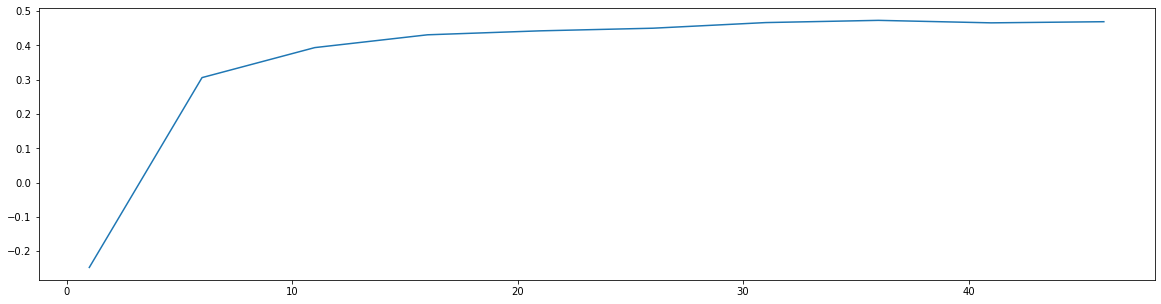

In [14]:
scorel = []
for i in range(0,50,5):
    rfc = RandomForestRegressor(n_estimators=i+1,
                                 random_state=90)
    score = cross_val_score(rfc,boston.data,boston.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,51,5),scorel)
plt.show()

In [15]:
# 网格搜索-这个方法可以让模型自己找到一个最有的参数，但是可能存在的问题是消耗很多的时间，并且运行的很慢

#调整max_depth
param_grid = {'max_depth':np.arange(1, 10, 1)}
rfc = RandomForestRegressor(n_estimators=39,random_state=90
                         )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(boston.data,boston.target)
# GS.best_params_
# GS.best_score_
print(f'{GS.best_params_}\t,{GS.best_score_}')

{'max_depth': 6}	,0.4749466576138599


In [16]:
#调整max_features
param_grid = {'max_features':np.arange(1,len(boston.feature_names),1)} 

rfc = RandomForestRegressor(n_estimators=39,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(boston.data,boston.target)
print(f'{GS.best_params_}\t,{GS.best_score_}')

{'max_features': 6}	,0.5717482789498302


In [17]:
# 带外数据
rf=RandomForestRegressor(random_state=25,n_estimators=20,oob_score=True)
rf=rf.fit(boston.data,boston.target)
rf.oob_score_

0.847947724578701

In [18]:
rf=RandomForestRegressor(random_state=25,n_estimators=39,max_depth=6)
rf=rf.fit(boston.data,boston.target)
print(cross_val_score(rf,boston.data,boston.target,cv=10).mean())
print(rf.score(x_test,y_test))
rf.feature_importances_#显示每一个特征是否被用来分类并且他的重要性是多少

0.4388118897959087
0.9547866695154038


array([3.55768326e-02, 1.91541224e-04, 3.00781641e-03, 6.81113755e-04,
       2.19036312e-02, 4.94149147e-01, 9.23113024e-03, 6.07065478e-02,
       2.76050749e-03, 1.34680331e-02, 1.41761794e-02, 6.80173235e-03,
       3.37345787e-01])

In [19]:
feature_name = boston.feature_names
[*zip(feature_name,rf.feature_importances_)]#将特征的名字和对应的重要性进行匹配

[('CRIM', 0.035576832574236196),
 ('ZN', 0.0001915412237576879),
 ('INDUS', 0.0030078164069333854),
 ('CHAS', 0.0006811137554465783),
 ('NOX', 0.02190363116282981),
 ('RM', 0.4941491473370226),
 ('AGE', 0.009231130241351193),
 ('DIS', 0.06070654780587061),
 ('RAD', 0.0027605074910851484),
 ('TAX', 0.013468033105037861),
 ('PTRATIO', 0.01417617942235199),
 ('B', 0.006801732353450419),
 ('LSTAT', 0.3373457871206266)]

In [21]:
pd.concat([pd.DataFrame(rf.predict(x_test)),pd.DataFrame(y_test)],axis=1)
# 可以看出预测值和实际值还是存在一定的差异的。但是精度已经不错啦

,0,0
0,22.230506,23.6
1,30.602618,32.4
2,15.256698,13.6
3,22.582924,22.8
4,16.584175,16.1
...,...,...
97,15.960835,17.9
98,11.329993,9.6
99,15.955152,17.2
100,20.562113,22.5
